## Object criticality for better and safer navigation

Main jupter; execute this to get the data; the other jupyter is to extract results and do some analysis.

*What you need*

* nuScenes dataset
* mmdetection3d if you want to re-run the detectors against nuScenes
* otherwise, just download the file we provide
* our directories with the modified nuScenes-devkit library
* conda environment, see yaml file


**Execute the object detectors**

First, you need to execute mmdetection3d models on nuScenes to compute all the Bounding Boxes and object attributes. Models are downloaded from mmdetection3d model zoo and typically stored in folder mmdetection3d/models/ . 

So you just need to launch python commands from mmdetection3d main folder. Results are saved in ./tmp with a default name. See below for model name, github to downlad it, weights file used, shell command, ... 

- SECFPN https://github.com/open-mmlab/mmdetection3d/tree/main/configs/ssn
  - hv_pointpillars_regnet-400mf_secfpn_sbn-all_4x8_2x_nus-3d_20200620_230334-53044f32.pth

    *run using:*

    python tools/test.py configs/regnet/pointpillars_hv_regnet-400mf_secfpn_sbn-all_8xb4-2x_nus-3d.py  models/hv_pointpillars_regnet-400mf_secfpn_sbn-all_4x8_2x_nus-3d_20200620_230334-53044f32.pth  --cfg-options 'test_evaluator.jsonfile_prefix=./tmp'
    
    result file saved in: ~/pkl/result_objdet/SECFPN/
    
    mAP measured: 0.3489


- SSN https://github.com/open-mmlab/mmdetection3d/tree/main/configs/ssn
  - RegNetX-400MF-SSN hv_ssn_regnet-400mf_secfpn_sbn-all_2x16_2x_nus-3d_20210829_210615-361e5e04.pth
  
    *run using:*

    python tools/test.py configs/ssn/ssn_hv_regnet-400mf_secfpn_sbn-all_16xb2-2x_nus-3d.py models/hv_ssn_regnet-400mf_secfpn_sbn-all_2x16_2x_nus-3d_20210829_210615-361e5e04.pth --cfg-options 'test_evaluator.jsonfile_prefix=./tmp'

    result file saved in: ~/pkl/result_objdet/SSN/

    mAP measured: 0.46
  
  
- FCOS3D https://github.com/open-mmlab/mmdetection3d/tree/main/configs/fcos3d
  - fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d_finetune_20210717_095645-8d806dc2.pth
  
    *run using:*

    python tools/test.py configs/fcos3d/fcos3d_r101-caffe-dcn_fpn_head-gn_8xb2-1x_nus-mono3d_finetune.py  models/fcos3d_r101_caffe_fpn_gn-head_dcn_2x8_1x_nus-mono3d_finetune_20210717_095645-8d806dc2.pth  --cfg-options 'test_evaluator.jsonfile_prefix=./tmp'

    result file saved in: ~/pkl/result_objdet/FCOS3d/

    mAP measured: 0.32


- pgd https://github.com/open-mmlab/mmdetection3d/tree/v1.0.0.dev0/configs/pgd
  - pgd_r101_caffe_fpn_gn-head_2x16_2x_nus-mono3d_20211112_125314-cb677266.pth

     *run using:*

    python tools/test.py configs/pgd/pgd_r101-caffe_fpn_head-gn_16xb2-1x_nus-mono3d_finetune.py models/pgd_r101_caffe_fpn_gn-head_2x16_1x_nus-mono3d_finetune_20211118_093245-fd419681.pth  --cfg-options 'test_evaluator.jsonfile_prefix=./tmp'

    result file saved in: ~/pkl/result_objdet/PGD/

    mAP measured: 0.33
    
 
- pointpillars https://github.com/open-mmlab/mmdetection3d/tree/main/configs/pointpillars
  - hv_pointpillars_fpn_sbn-all_fp16_2x8_2x_nus-3d_20201021_120719-269f9dd6.pth
 
     *run using:*

    python tools/test.py configs/pointpillars/pointpillars_hv_fpn_sbnpointpillars/pointpillars_hv_fpn_sbn-all_8xb2-amp-2x_nus-3d.py models/hv_pous-3d_20201021_120719-269f9dd6.pthintpillars_fpn_sbn-all_fp16_2x8_2x_nus-3d_20201021_120719-269f9dd6.pth   --cfg-options 'test_evaluator.jsonfile_prefix=./tmp'

    result file saved in: ~/pkl/result_objdet/POINTP/

    mAP measured: 0.35
    

- RegNetX-1.6gF-FPN https://github.com/open-mmlab/mmdetection3d/tree/main/configs/regnet
  - hv_pointpillars_regnet-1.6gf_fpn_sbn-all_4x8_2x_nus-3d_20200629_050311-dcd4e090.pth 
  
     *run using:*

    python tools/test.py configs/regnet/pointpillars_hv_regnet-1.6gf_fpn_sbn-all_8xb4-2x_nus-3d.py models/hv_pointpillars_regnet-1.6gf_fpn_sbn-all_4x8_2x_nus-3d_20200629_050311-dcd4e090.pth  --cfg-options 'test_evaluator.jsonfile_prefix=./tmp1'

    result file saved in: ~/pkl/result_objdet/REG/

    mAP measured: 0.44
    

- NOT IMPLEMENTED YET BEVFusion https://github.com/open-mmlab/mmdetection3d/tree/dev-1.x/projects/BEVFusion
  - lidar bevfusion_lidar_voxel0075_second_secfpn_8xb4-cyclic-20e_nus-3d-2628f933.pth


-  NOT IMPLEMENTED YET  DETR3D https://github.com/open-mmlab/mmdetection3d/tree/dev-1.x/projects/DETR3D
  - DETR3D, detr3d_r101_gridmask.pth


**Now the following code realizes our GOALs**

**Note1:** it takes several days to execute. It is strongly recommended to divide the execution in shorter runs.

**Note2:** for GOAL1, it is OK to run this and that's all. For GOAL2, it is recommended to run with selected settings. This will save lots of time. Then with the preferred settings, you can do detailed investigations using the other jupyter notebook we provide.

In [61]:
import numpy as np
import os
import itertools
import unittest
import sklearn
import tqdm
import pandas
import math
import json
from typing import Callable
from nuscenes import NuScenes
from nuscenes.eval.prediction.splits import *
import nuscenes.eval.detection.config as cnfig
from nuscenes.eval.detection.configs import *
from nuscenes.eval.detection.data_classes import DetectionBox 
from nuscenes.eval.detection import *
import nuscenes.eval.detection.algo as ag
from nuscenes.eval.detection.data_classes import DetectionMetricData, DetectionConfig, DetectionMetrics, DetectionBox, \
    DetectionMetricDataList
from nuscenes.eval.common.data_classes import EvalBoxes
from typing import List, Dict, Callable, Tuple
from nuscenes.eval.common.utils import center_distance, scale_iou, yaw_diff, velocity_l2, attr_acc, cummean
import nuscenes.eval.detection.evaluate as dcl    
from nuscenes.prediction import *
from nuscenes.map_expansion.map_api import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import torch
import json
import numpy as np
import cv2
from pyquaternion import Quaternion
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

from pkl.models import compile_model

**Debugging parameters** , set both to False if you are doing the long run.

If test = True, it only runs few combinations. Good to have a first understanding of what happens.

If verbose = True, it prints many things and do more checks. Will take much more time to execute.

In [3]:
test=False #does reduced runs, with fewer parameters
verbose=False #avoid so much printing, checks, elaborations, ...

**Configuration items**

Configuration parameters. Rather intuitive: 

* set the GOAL you want (see the paper)
*  decide if you want only cars or all objects
* and set the paths to the correct folders.

In [4]:
GOAL="GOAL2" #set GOAL2, GOAL3, GOAL4 depending what to evaluate

car_only=False #filters out all non-car objects

In [5]:
if(GOAL=="GOAL1"): # GOAL1 configs
    #the classes we consider. We can create "set of objects". It accepts 2 sets of objects.
    #however we have a criticality model only for cars -- so do not remove cars from the list
    #TODO WE NEED CURRENTLY TO EXECUTE EVERYTHING TWICE; THE object_classes_reduced does nothing
    if test:
        object_classes=['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']    
        object_classes_reduced=['car']
    else:    
        object_classes=['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']    
        object_classes_reduced=['car']

    if car_only:
        object_classes=object_classes_reduced

    if test:
    #distance, intersect, time from our marvellous solution. 
        MAX_D=[15, 20,  25]
        MAX_R=[15, 20,  25]
        MAX_T=[12, 16, 20]
    else:
    #distance, intersect, time from our marvellous solution. 
        MAX_D=list(range(5, 55, 10))
        MAX_R=list(range(5, 55, 10))
        MAX_T=list(range(4, 25, 10))
#        MAX_D=list(range(5, 35, 5))
#        MAX_R=list(range(5, 35, 5))
#        MAX_T=list(range(4, 22, 4))

    #distance_intersect_time combinations
    DRT = list(itertools.product(*[MAX_D, MAX_R, MAX_T]))

    #the 4 distances for evaluation
    if test: #but it is essentially useless to reduce here
        dist=[0.5, 1.0, 2.0, 4.0]
    else:
        dist=[0.5, 1.0, 2.0, 4.0]

    #the confidence thresholds for the pkl
    if test:
        CONF_TH= [0.4, 0.45, 0.5]
    else:
        CONF_TH=list(np.arange(0.05, 0.4, 0.05))
#        CONF_TH=list(np.arange(0.4, 0.6, 0.05))

    #the criticalities thresholds of the pkl
    if test:
        criticalities=[ 0.4, 0.5, 0.6, 0.7, 0.8]
    else:
        criticalities=list(np.arange(0.10, 0.4, 0.05))
#        criticalities=list(np.arange(0.3, 0.7, 0.05))

if (GOAL=='GOAL2'):
    if test:
        object_classes=['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']    
        object_classes_reduced=['car']
    else:    
        object_classes=['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']    
        object_classes_reduced=['car']

    if car_only:
        object_classes=object_classes_reduced

    if test:
    #distance, intersect, time from our marvellous solution. 
        MAX_D=[5, 55,  5]
        MAX_R=[5, 55,  5]
        MAX_T=[4, 10, 30]
    else:
    #distance, intersect, time from our marvellous solution. 
        MAX_D=list(range(5, 45, 10))
        MAX_R=list(range(5, 45, 10))
        MAX_T=list(range(4, 30, 10))

    #distance_intersect_time combinations
    DRT = list(itertools.product(*[MAX_D, MAX_R, MAX_T]))

    #the 4 distances for evaluation
    if test: #but it is essentially useless to reduce here
        dist=[0.5, 1.0, 2.0, 4.0]
    else:
        dist=[0.5, 1.0, 2.0, 4.0]

    #the confidence thresholds for the pkl
    if test:
        CONF_TH= [0.05, 0.15]
    else:
        CONF_TH=list(np.arange(0.05, 0.9, 0.1))

    #the criticalities thresholds of the pkl
    if test:
        criticalities=[ 0.7, 0.9]
    else:
        criticalities=list(np.arange(0.1, 0.95, 0.1))

system and output configuration

In [6]:
nworkers=10 # number of workers for dataloader: depends on your resources!
bsz= 128# batch size for dataloader: depends on your resources!
gpuid=0 #id of the gpu; -1 if no GPU

#base path for the notebook (home directory)
NOTEBOOK_HOME='/home/notebook/'
    
#nuscene dataset install folder
DATAROOT=NOTEBOOK_HOME+'nuscene/data'

#pkl path to planner.pt and masks_trainval.json
modelpath=NOTEBOOK_HOME+'pkl/Evaluation-Of-Safety-Oriented-Metrics-for-Object-Detectors/metrics_model/planner.pt'
mask_json=NOTEBOOK_HOME+'pkl/Evaluation-Of-Safety-Oriented-Metrics-for-Object-Detectors/metrics_model/masks_trainval.json'

#results of the object detectors (result_nusc.json) are stored here, in subdirectories:
#PATH+DETECTOR+FILE_JSON
#e.g. '/home/notebook/pkl/result_objdet/PGD/results_nusc.json'
PATH=NOTEBOOK_HOME+'pkl/result_objdet/'
FILE_JSON='/results_nusc.json'

#results computed are stored here. Subfolders will be created, like:
#/home/notebook/pkl/results/PGD/'
RESULTS_PATH=NOTEBOOK_HOME+'pkl/results/GOAL2/retry_allobjects/'

#how many images in bird view you want to draw
NUMBER_IMAGE=0

Should not be touched. If test is False, will take days.

In [7]:
if test:
    DETECTOR= {"PointPillars": 'POINTP',}
else:
    #the object detector that were experimented on nuscenes
    DETECTOR= {#"RegNetX-1.6gF-FPN":'REG',
            "SECFPN": 'SECFPN',
            "PointPillars": 'POINTP',
            "SSN": 'SSN',
            "PGD": 'PGD',
            "FCOS3D": 'FCOS3D',
            }


Following is whole code

In [8]:
nuscenes = NuScenes('v1.0-trainval', dataroot=DATAROOT)
confvalue=cnfig.config_factory("detection_cvpr_2019")

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 29.858 seconds.
Reverse indexing ...
Done reverse indexing in 8.2 seconds.


In [9]:
#number of scene that compose the val set
if test:
    eval=val =['scene-0519','scene-0013',]

else:
    eval=val = ['scene-0013',
                'scene-0554',
                'scene-0771',
                'scene-0929',
                'scene-1070',
                'scene-1072',
                'scene-0798',
                'scene-0108',
                'scene-0519',
                'scene-0332',
               ]
'''
        ['scene-0003', 'scene-0012', 'scene-0013', 'scene-0014', 'scene-0015', 'scene-0016', 'scene-0017', 'scene-0018',
         'scene-0035', 'scene-0036', 'scene-0038', 'scene-0039', 'scene-0092', 'scene-0093', 'scene-0094', 'scene-0095',
         'scene-0096', 'scene-0097', 'scene-0098', 'scene-0099', 'scene-0100', 'scene-0101', 'scene-0102', 'scene-0103',
         'scene-0104', 'scene-0105', 'scene-0106', 'scene-0107', 'scene-0108', 'scene-0109', 'scene-0110', 'scene-0221',
         'scene-0268', 'scene-0269', 'scene-0270', 'scene-0271', 'scene-0272', 'scene-0273', 'scene-0274', 'scene-0275',
         'scene-0276', 'scene-0277', 'scene-0278', 'scene-0329', 'scene-0330', 'scene-0331', 'scene-0332', 'scene-0344',
         'scene-0345', 'scene-0346', 'scene-0519', 'scene-0520', 'scene-0521', 'scene-0522', 'scene-0523', 'scene-0524',
         'scene-0552', 'scene-0553', 'scene-0554', 'scene-0555', 'scene-0556', 'scene-0557', 'scene-0558', 'scene-0559',
         'scene-0560', 'scene-0561', 'scene-0562', 'scene-0563', 'scene-0564', 'scene-0565', 'scene-0625', 'scene-0626',
         'scene-0627', 'scene-0629', 'scene-0630', 'scene-0632', 'scene-0633', 'scene-0634', 'scene-0635', 'scene-0636',
         'scene-0637', 'scene-0638', 'scene-0770', 'scene-0771', 'scene-0775', 'scene-0777', 'scene-0778', 'scene-0780',
         'scene-0781', 'scene-0782', 'scene-0783', 'scene-0784', 'scene-0794', 'scene-0795', 'scene-0796', 'scene-0797',
         'scene-0798', 'scene-0799', 'scene-0800', 'scene-0802', 'scene-0904', 'scene-0905', 'scene-0906', 'scene-0907',
         'scene-0908', 'scene-0909', 'scene-0910', 'scene-0911', 'scene-0912', 'scene-0913', 'scene-0914', 'scene-0915',
         'scene-0916', 'scene-0917', 'scene-0919', 'scene-0920', 'scene-0921', 'scene-0922', 'scene-0923', 'scene-0924',
         'scene-0925', 'scene-0926', 'scene-0927', 'scene-0928', 'scene-0929', 'scene-0930', 'scene-0931', 'scene-0962',
         'scene-0963', 'scene-0966', 'scene-0967', 'scene-0968', 'scene-0969', 'scene-0971', 'scene-0972', 'scene-1059',
         'scene-1060', 'scene-1061', 'scene-1062', 'scene-1063', 'scene-1064', 'scene-1065', 'scene-1066', 'scene-1067',
         'scene-1068', 'scene-1069', 'scene-1070', 'scene-1071', 'scene-1072', 'scene-1073']
''';

In [10]:
len(eval)

10

In [11]:
#get the list of tokens in the val set (150 scenes), put it in a file to be used as input
scenes_list=[]
counter=0

for i in nuscenes.scene:
    name=i['name']
    if(name in val):
        counter=counter+1
        scenes_list.append(i)

validation_samples={}
for i in scenes_list:
    scene_name=i['name']
    sample_token_list=[]
    first_sample_token=i['first_sample_token']
    last_sample_token=i['last_sample_token']
    current_sample_token=first_sample_token
    sample_token_list.append(current_sample_token)
    if(sample_token_list[0]!=first_sample_token):
        print("error")
        break
    while(current_sample_token!=last_sample_token):
        sample=nuscenes.get('sample', current_sample_token)
        current_sample_token=sample['next']
        sample_token_list.append(current_sample_token)
    if(sample_token_list[len(sample_token_list)-1]!=last_sample_token):
        print("error")
        break
    
    validation_samples.update({scene_name:sample_token_list})

listtoken=[]
for i in validation_samples.keys():
    listtoken.extend(validation_samples[i])

with open(RESULTS_PATH+"/token_list.json", "w") as outfile: 
    json.dump(validation_samples, outfile)

In [12]:
def create_dt(detector_file="none",
              val='val',
              model='none',
              d=1,
              r=1,
              t=1,
              verbose=False,
              recall_type="PRED AL NUMERATORE",
              nworkers=10, #for pkl
              bsz= 128, #for pkl
              gpuid=0# GPU ID, -1 if CPU only
             ):

    
    dt=dcl.DetectionEval(nusc=nuscenes,
        config=confvalue,
        result_path=detector_file,
        eval_set=val,
        model_name=model,
        MAX_DISTANCE_OBJ=d,
        MAX_DISTANCE_INTERSECT=r,
        MAX_TIME_INTERSECT_OBJ=t,
        verbose=verbose,
        recall_type="PRED AL NUMERATORE",
        nworkers=nworkers,
        bsz=bsz,
        gpuid=gpuid
        )
    
    return dt

In [13]:
def compute_crit_pkl(dt,
                     listtoken=[],
                     conf_th_list=[0.4],
                     dist_list=[2.0],
                     crit_list=[0.5],
                     object_classes='car',
                     verbose=False,
                     model_loaded=False,#an attempt to load the model outside the pkl
                     model_object=None):

    results= dt.safety_metric_evaluation(
                    list_of_tokens=listtoken,
                    conf_th_list=conf_th_list,
                    dist_list=dist_list,
                    crit_list=criticalities,
                    obj_classes_list=object_classes, 
                    render_images=False,
                    verbose=verbose,
                    model_loaded=True,#an attempt to load the model outside the pkl
                    model_object=model_object,
                    )
    
    return results

In [14]:
def compute_crit_pkl_GOAL2(dt,
                     listtoken=[],
                     conf_th_list=[0.4],
                     dist_list=[2.0],
                     crit_list=[0.5],
                     object_classes='car',
                     verbose=False,
                     model_loaded=False,#an attempt to load the model outside the pkl
                     model_object=None):

    results= dt.safety_metric_evaluation_GOAL2(
                    list_of_tokens=listtoken,
                    conf_th_list=conf_th_list,
                    dist_list=dist_list,
                    crit_list=criticalities,
                    obj_classes_list=object_classes, 
                    render_images=False,
                    verbose=verbose,
                    model_loaded=model_loaded,#an attempt to load the model outside the pkl
                    model_object=model_object,
                    )
    return results

load pkl model

In [15]:
# constants related to how the planner was trained
layer_names = ['road_segment', 'lane']
line_names = ['road_divider', 'lane_divider']
stretch = 70.0

device = torch.device(f'cuda:0')

# load planner
model = compile_model(cin=5, cout=16, with_skip=True,
                          dropout_p=0.0).to(device)

if not os.path.isfile(modelpath):
    print(f'downloading model weights to location {modelpath}...')
    cmd = f"wget --quiet --no-check-certificate 'https://docs.google.com/uc?export=download&id=1feEIUjYSNWkl_b5SUkmPZ_-JAj3licJ9' -O {modelpath}"
    print(f'running {cmd}')
    os.system(cmd)
    print(f'using model weights {modelpath}')

model.load_state_dict(torch.load(modelpath, map_location=torch.device('cpu')))

model.to(device)
model.eval()

# load masks
if not os.path.isfile(mask_json):
    print(f'downloading model masks to location {mask_json}...')
    cmd = f"wget --quiet --no-check-certificate 'https://docs.google.com/uc?export=download&id=13M1xj9MkGo583ok9z8EkjQKSV8I2nWWF' -O {mask_json}"
    print(f'running {cmd}')
    os.system(cmd)
    if verbose:
        print(f'using location masks {mask_json}')
with open(mask_json, 'r') as reader:
    masks = (torch.Tensor(json.load(reader)) == 1).to(device)

model_object=[model, masks]

/home/notebook/anaconda3/envs/openmmlab/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/notebook/anaconda3/envs/openmmlab/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


**GOAL 1**

In [16]:
dist_list=dist
#iterate on all detectors (SSN, POINTPILLARS, ...)
for detector_name, folder in DETECTOR.items():
    if (GOAL!="GOAL1"):#just a bad trick to avoid this code if GOAL1 is not the target
        continue
    pkl_results_store=[]
    pkl_crit_results_store=[]
    ap_results_store=[]
    print(detector_name, folder)
    #path + json file where detection results from mmdetection3d are stored, ready to be processed
    detector_file=PATH+folder+FILE_JSON
    #results of evaluation will be stored here
    output_folder=RESULTS_PATH+folder+"/"
    if not os.path.exists(output_folder): 
        os.makedirs(output_folder) 
    #iterate on drt
    for d, r, t  in DRT:
        print("DRT tuple is {}, {}, {}".format(d, r, t))
        print("Loading dt")
        dt=create_dt(detector_file,
                     'val',
                     model=detector_name,
                     d=d,
                     r=r,
                     t=t,
                     verbose=verbose,
                     recall_type="PRED AL NUMERATORE")
        #compute ap, ap_crit, and pkl, varying dist, confth
        print("Now evaluating object_classes {}".format(object_classes))
        ap_results, pkl_results, pkl_crit_results=compute_crit_pkl(dt=dt,
                     listtoken=listtoken,
                     conf_th_list=CONF_TH,
                     dist_list=dist_list,
                     crit_list=criticalities,
                     object_classes=object_classes,#filter boxes based on class
                     verbose=verbose,
                     model_loaded=True,#an attempt to load the model outside the pkl
                     model_object=model_object)

        #storing values for later printing in json file
        ap_results.update({"DRT": {"D": d, "R": r, "T": t}})
        ap_results_store.append(ap_results)
        pkl_results_store.append(pkl_results)
        pkl_crit_results_store.append(pkl_crit_results)

        with open(output_folder+'ap_results.json', 'w') as f:
            json.dump({"AP_RESULTS": ap_results_store}, f)
        
        with open(output_folder+'pkl_results.json', 'w') as f:
            json.dump({"PKL_RESULTS": pkl_results_store}, f)

        with open(output_folder+'pkl_crit_results_GOAL1.json', 'w') as f:
            json.dump({"PKL_CRIT_RESULTS": pkl_crit_results_store}, f)

        print("ONE FULL ROUND COMPLETED! drt= {}, model={}".format((d,r, t), detector_name))
        dt=None

    with open(output_folder+'ap_results.json', 'w') as f:
        json.dump({"AP_RESULTS": ap_results_store}, f)

    with open(output_folder+'pkl_results.json', 'w') as f:
        json.dump({"PKL_RESULTS": pkl_results_store}, f)

    with open(output_folder+'pkl_crit_results_GOAL1.json', 'w') as f:
        json.dump({"PKL_CRIT_RESULTS": pkl_crit_results_store}, f)


**GOAL 2**

In [17]:
dist_list=dist
#iterate on all detectors (SSN, POINTPILLARS, ...)
for detector_name, folder in DETECTOR.items():
    if (GOAL!="GOAL2"):#just a bad trick to avoid this code if GOAL2 is not the target
        continue
    pkl_crit_results_store=[]
    #path + json file where detection results from mmdetection3d are stored, ready to be processed
    detector_file=PATH+folder+FILE_JSON
    #results of evaluation will be stored here
    output_folder=RESULTS_PATH+folder+"/"
    if not os.path.exists(output_folder): 
        os.makedirs(output_folder) 
    #iterate on drt
    for d, r, t  in DRT:
        print("DRT tuple is {}, {}, {}".format(d, r, t))
        print("Loading dt")
        dt=create_dt(detector_file,
                     'val',
                     model=detector_name,
                     d=d,
                     r=r,
                     t=t,
                     verbose=verbose,
                     recall_type="PRED AL NUMERATORE")
        #compute ap, ap_crit, and pkl, varying dist, confth
        print("Now evaluating object_classes {}".format(object_classes))
        pkl_crit_results=compute_crit_pkl_GOAL2(dt=dt,
                                 listtoken=listtoken,
                                 conf_th_list=CONF_TH,
                                 dist_list=dist_list,
                                 crit_list=criticalities,
                                 object_classes=object_classes,#filter boxes based on class
                                 verbose=verbose,
                                 model_loaded=True,#an attempt to load the model outside the pkl
                                 model_object=model_object)

        #storing values for later printing in json file
        pkl_crit_results_store.append(pkl_crit_results)

        with open(output_folder+'pkl_crit_results_GOAL2.json', 'w') as f:
            json.dump({"PKL_CRIT_RESULTS_GOAL2": pkl_crit_results_store}, f)

        print("ONE FULL ROUND COMPLETED! drt= {}, model={}".format((d,r, t), detector_name))
        dt=None

#    with open(output_folder+'ap_results.json', 'w') as f:
#        json.dump({"AP_RESULTS": ap_results_store}, f)

#    with open(output_folder+'pkl_results.json', 'w') as f:
#        json.dump({"PKL_RESULTS": pkl_results_store}, f)

    with open(output_folder+'pkl_crit_results_GOAL2.json', 'w') as f:
        json.dump({"PKL_CRIT_RESULTS_GOAL2": pkl_crit_results_store}, f)

DRT tuple is 5, 5, 4
Loading dt


Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

Now evaluating object_classes ['car', 'truck', 'bus', 'trailer', 'construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle', 'traffic_cone', 'barrier']
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls computed with output of size : 403
pkls 

**Compute selected values of precision-recall**

The following is to compute selected "precision-recall curves". 

The objective is to compute the "precision-recall" pairs with:

- the usual object detector, i.e., no modifications to bboxes

- the bboxes filtered with the criticality of the minimum pkl, with GOAL1 approach

We compare the results, to show that we are not simply finding an optimal configuration of the detector, i.e., an optimal precision/recall tradeoff, but we are doing somethign entirely different and disconnected from precision/recall curves.

In [274]:
DETECTOR='SECFPN' #indicate the detector: PGD, FCOS3D, etc.
#I use the median best pkl under GOAL1
if(DETECTOR=='FCOS3D'):
    D, R, T= 50, 10, 24 #target values on which you have best pkl with GOAL1
    confidence_threshold= 0.25 #target values on which you have best pkl with GOAL1; not used
    criticality_threshold= 0.30  #target values on which you have best pkl with GOAL1
if(DETECTOR=='PGD'):
    D, R, T= 50, 50, 24 #target values on which you have best pkl with GOAL1
    confidence_threshold= 0.05 #target values on which you have best pkl with GOAL1; not used
    criticality_threshold= 0.2  #target values on which you have best pkl with GOAL1
if(DETECTOR=='POINTP'):
    D, R, T= 5, 5, 4 #target values on which you have best pkl with GOAL1
    confidence_threshold= 0.55 #target values on which you have best pkl with GOAL1; not used
    criticality_threshold= 0.65  #target values on which you have best pkl with GOAL1
if(DETECTOR=='REG'):
    D, R, T= 5, 5, 4 #target values on which you have best pkl with GOAL1
    confidence_threshold= 0.5 #target values on which you have best pkl with GOAL1; not used
    criticality_threshold= 0.65  #target values on which you have best pkl with GOAL1
if(DETECTOR=='SECFPN'):
    D, R, T= 10, 5, 8 #target values on which you have best pkl with GOAL1
    confidence_threshold= 0.4 #target values on which you have best pkl with GOAL1; not used
    criticality_threshold= 0.65  #target values on which you have best pkl with GOAL1
if(DETECTOR=='SSN'):
    D, R, T= 45, 45, 40 #target values on which you have best pkl with GOAL1
    confidence_threshold= 0.25 #target values on which you have best pkl with GOAL1; not used
    criticality_threshold= 0.15  #target values on which you have best pkl with GOAL1


In [275]:
#given target confidence, and the tuple of all the (recall, precision, confidence),
#extract the triple (recall, precision, confidence)
def prc(prec_rec_conf, target_confidence):
    list_confidences=np.asarray(prec_rec_conf[2])
    index=(np.abs(list_confidences - target_confidence)).argmin()
    #recall, precision, confidence
    return prec_rec_conf[0][index], prec_rec_conf[1][index], prec_rec_conf[2][index]

In [276]:
detector_file='/home/notebook/pkl/result_objdet/'+DETECTOR+'/results_nusc.json'
save_in='/home/notebook/pkl/results/GOAL1/all_objects/'+DETECTOR+'/PrecisionRecall/Normal/' #will save all the data, that we need to explore to build precision recall curves

In [277]:
detector_name=DETECTOR
#we compute precision and recall curve with the predicted bboxes
#ignore the crit in this case, just use precision-recall metric

dt=dcl.DetectionEval(nusc=nuscenes,
        config=confvalue,
        result_path=detector_file,
        eval_set='val',
        model_name=detector_name,
        MAX_DISTANCE_OBJ=D,
        MAX_DISTANCE_INTERSECT=R,
        MAX_TIME_INTERSECT_OBJ=T,
        verbose=True,
        recall_type="PRED AL NUMERATORE",
        nworkers=12,
        bsz=128,
        gpuid=0, output_dir=save_in, crit=-10 #no criticality threshold to filter out BBOXES
        )

dt.main(plot_examples=0, #must be 0
        render_curves=False, #must be False
        model_name=detector_name,
        MAX_DISTANCE_OBJ=D,
        MAX_DISTANCE_INTERSECT=R,
        MAX_TIME_INTERSECT=T,
        recall_type="PRED AL NUMERATORE")

Initializing nuScenes detection evaluation
Loaded results from /home/notebook/pkl/result_objdet/SECFPN/results_nusc.json. Found detections for 6019 samples.
Loading annotations for val split from nuScenes version: v1.0-trainval


100%|█████████████████████████████████████████████████████████████| 6019/6019 [00:10<00:00, 578.62it/s]


Loaded ground truth annotations for 6019 samples.
Filtering predictions
=> Original number of boxes: 800693
=> After distance based filtering: 800528
=> After LIDAR points based filtering: 800528
=> After bike rack filtering: 799058
Filtering ground truth annotations
=> Original number of boxes: 187528
=> After distance based filtering: 134565
=> After LIDAR points based filtering: 121871
=> After bike rack filtering: 121861
STARTING EVALUATION in main (self)
STARTING EVALUATION in evaluate(self)
Accumulating metric data...
predicted bboxes are EvalBoxes with 799058 boxes across 6019 samples
Calculating metrics...
Saving metrics to: /home/notebook/pkl/results/GOAL1/all_objects/SECFPN/PrecisionRecall/Normal/


{'label_aps': defaultdict(<function nuscenes.eval.detection.data_classes.DetectionMetrics.__init__.<locals>.<lambda>()>,
             {'car': defaultdict(float,
                          {0.5: 0.6969597746121431,
                           1.0: 0.8220849645158869,
                           2.0: 0.8529115460721016,
                           4.0: 0.8660122659086587}),
              'truck': defaultdict(float,
                          {0.5: 0.2520773018618363,
                           1.0: 0.4516468355025376,
                           2.0: 0.5309992961954855,
                           4.0: 0.5675072714444752}),
              'bus': defaultdict(float,
                          {0.5: 0.2946422352360758,
                           1.0: 0.6210541603460011,
                           2.0: 0.7203864597576242,
                           4.0: 0.7452325076520262}),
              'trailer': defaultdict(float,
                          {0.5: 0.059432053633570084,
                           1.

In [278]:
f=open(save_in+'metrics_details.json', "r")
data=json.load(f)

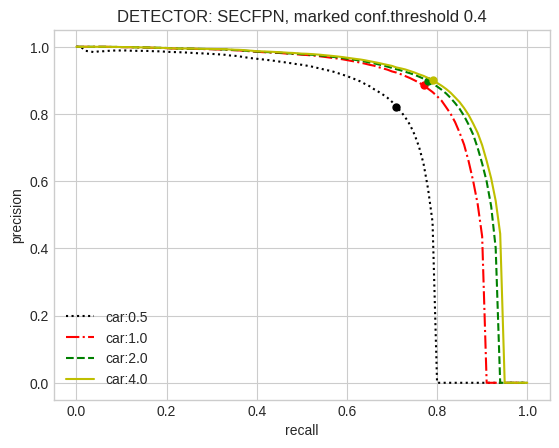

In [279]:
%matplotlib inline
normal_05=[data['car:0.5']['recall'],data['car:0.5']['precision'],data['car:0.5']['confidence']]
normal_1=[data['car:1.0']['recall'], data['car:1.0']['precision'],data['car:1.0']['confidence']]
normal_2=[data['car:2.0']['recall'], data['car:2.0']['precision'],data['car:2.0']['confidence']]
normal_4=[data['car:4.0']['recall'], data['car:4.0']['precision'],data['car:4.0']['confidence']]

i,j,k=prc(normal_05, confidence_threshold)
plt.plot(i,j,'k',marker="o", markersize=5, markerfacecolor="black")
plt.plot(normal_05[0], normal_05[1], 'k', linestyle='dotted', label='car:0.5')

i,j,k=prc(normal_1, confidence_threshold)
plt.plot(i,j,'r',marker="o", markersize=5, markerfacecolor="red")
plt.plot(normal_1[0], normal_1[1], 'r', linestyle='dashdot', label='car:1.0')

i,j,k=prc(normal_2, confidence_threshold)
plt.plot(i,j,'g',marker="o", markersize=5, markerfacecolor="green")
plt.plot(normal_2[0], normal_2[1], 'g', linestyle='dashed', label='car:2.0')

i,j,k=prc(normal_4, confidence_threshold)
plt.plot(i,j,'y',marker="o", markersize=5, markerfacecolor="y")
plt.plot(normal_4[0], normal_4[1], 'y', label='car:4.0')

plt.xlabel("recall")
plt.ylabel("precision")
plt.title("DETECTOR: {}, marked conf.threshold {}".format(DETECTOR, confidence_threshold))
plt.legend()
plt.savefig(save_in+'precision_recall.png')
plt.show()

In [280]:
save_in='/home/notebook/pkl/results/GOAL1/all_objects/'+DETECTOR+'/PrecisionRecall/ReducedBBoxes/' #will save all the data, that we need to explore to build precision recall curves

In [281]:
dt=dcl.DetectionEval(nusc=nuscenes,
        config=confvalue,
        result_path=detector_file,
        eval_set='val',
        model_name=detector_name,
        MAX_DISTANCE_OBJ=D,
        MAX_DISTANCE_INTERSECT=R,
        MAX_TIME_INTERSECT_OBJ=T,
        verbose=True,
        recall_type="PRED AL NUMERATORE",
        nworkers=12,
        bsz=128,
        gpuid=0, output_dir=save_in, crit=criticality_threshold
        )


dt.main(plot_examples=0, #must be 0
        render_curves=False, #must be False
        model_name=detector_name,
        MAX_DISTANCE_OBJ=D,
        MAX_DISTANCE_INTERSECT=R,
        MAX_TIME_INTERSECT=T,
        recall_type="PRED AL NUMERATORE") 

Initializing nuScenes detection evaluation
Loaded results from /home/notebook/pkl/result_objdet/SECFPN/results_nusc.json. Found detections for 6019 samples.
Loading annotations for val split from nuScenes version: v1.0-trainval


100%|█████████████████████████████████████████████████████████████| 6019/6019 [00:10<00:00, 577.39it/s]


Loaded ground truth annotations for 6019 samples.
Filtering predictions
=> Original number of boxes: 800693
=> After distance based filtering: 800528
=> After LIDAR points based filtering: 800528
=> After bike rack filtering: 799058
Filtering ground truth annotations
=> Original number of boxes: 187528
=> After distance based filtering: 134565
=> After LIDAR points based filtering: 121871
=> After bike rack filtering: 121861
STARTING EVALUATION in main (self)
STARTING EVALUATION in evaluate(self)
Accumulating metric data...
predicted bboxes are EvalBoxes with 301539 boxes across 6019 samples
Calculating metrics...
Saving metrics to: /home/notebook/pkl/results/GOAL1/all_objects/SECFPN/PrecisionRecall/ReducedBBoxes/


{'label_aps': defaultdict(<function nuscenes.eval.detection.data_classes.DetectionMetrics.__init__.<locals>.<lambda>()>,
             {'car': defaultdict(float,
                          {0.5: 0.1898293165775525,
                           1.0: 0.2280947050576336,
                           2.0: 0.2386082632368158,
                           4.0: 0.2475026117159974}),
              'truck': defaultdict(float,
                          {0.5: 0.0459560272070856,
                           1.0: 0.0980371744824262,
                           2.0: 0.1168700757951721,
                           4.0: 0.1289583572637068}),
              'bus': defaultdict(float,
                          {0.5: 0.025543851977283923,
                           1.0: 0.10591272057268257,
                           2.0: 0.133910157645499,
                           4.0: 0.14407373379113383}),
              'trailer': defaultdict(float,
                          {0.5: 0.0,
                           1.0: 0.013936511

In [282]:
f=open(save_in+'metrics_details.json', "r")
data=json.load(f)

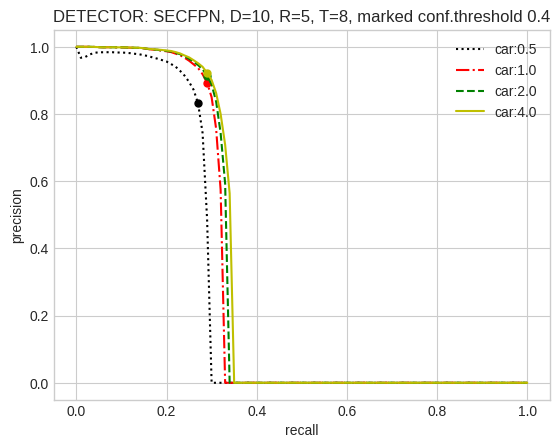

In [283]:
#we compute precision and recall with the filtered bboxes
#we consider the precision and recall that we get with the bboxes 
#under given confidence threshold and criticality threshold
%matplotlib inline
special_05=[data['car:0.5']['recall'],data['car:0.5']['precision'],data['car:0.5']['confidence']]
special_1=[data['car:1.0']['recall'], data['car:1.0']['precision'],data['car:1.0']['confidence']]
special_2=[data['car:2.0']['recall'], data['car:2.0']['precision'],data['car:2.0']['confidence']]
special_4=[data['car:4.0']['recall'], data['car:4.0']['precision'],data['car:4.0']['confidence']]

i,j,k=prc(special_05, confidence_threshold)
plt.plot(i,j,'k',marker="o", markersize=5, markerfacecolor="black")
plt.plot(special_05[0], special_05[1], 'k', linestyle='dotted', label='car:0.5')

i,j,k=prc(special_1, confidence_threshold)
plt.plot(i,j,'r',marker="o", markersize=5, markerfacecolor="r")
plt.plot(special_1[0], special_1[1], 'r', linestyle='dashdot', label='car:1.0')

i,j,k=prc(special_2, confidence_threshold)
plt.plot(i,j,'g',marker="o", markersize=5, markerfacecolor="g")
plt.plot(special_2[0], special_2[1], 'g', linestyle='dashed', label='car:2.0')

i,j,k=prc(special_4, confidence_threshold)
plt.plot(i,j,'y',marker="o", markersize=5, markerfacecolor="y")
plt.plot(special_4[0], special_4[1], 'y', label='car:4.0')

plt.xlabel("recall")
plt.ylabel("precision")
plt.title("DETECTOR: {}, D={}, R={}, T={}, marked conf.threshold {}".format(DETECTOR, D, R, T,confidence_threshold))
plt.legend()
plt.savefig(save_in+'precision_recall.png')
plt.show()

overlapped figure; this is to show the differences between the two, and the value of precision for our preferred confidence

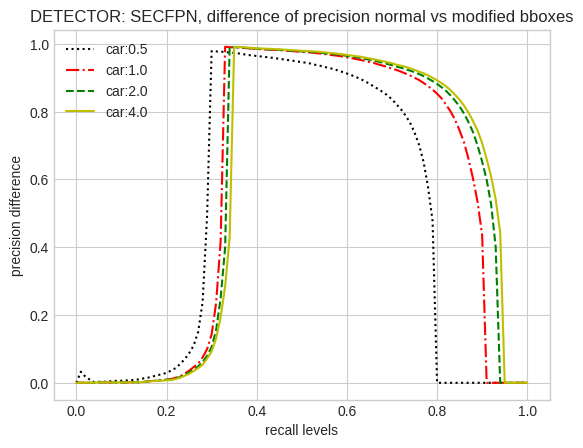

In [284]:
%matplotlib inline

normal_precision, normal_recall, target_confidence=prc(normal_05, confidence_threshold)
special_precision, special_recall, special_confidence=prc(special_05, confidence_threshold)

normal_precision, normal_recall, target_confidence=prc(normal_1, confidence_threshold)
special_precision, special_recall, special_confidence=prc(special_1, confidence_threshold)

normal_precision, normal_recall, target_confidence=prc(normal_2, confidence_threshold)
special_precision, special_recall, special_confidence=prc(special_2, confidence_threshold)

normal_precision, normal_recall, target_confidence=prc(normal_4, confidence_threshold)
special_precision, special_recall, special_confidence=prc(special_4, confidence_threshold)

plt.plot(normal_05[0],np.asarray(normal_05[1])-np.asarray(special_05[1]), 'k', linestyle='dotted', label='car:0.5')
plt.plot(normal_1[0],np.asarray(normal_1[1])-np.asarray(special_1[1]), 'r', linestyle='dashdot', label='car:1.0')
plt.plot(normal_2[0],np.asarray(normal_2[1])-np.asarray(special_2[1]), 'g', linestyle='dashed', label='car:2.0')
plt.plot(normal_4[0],np.asarray(normal_4[1])-np.asarray(special_4[1]), 'y', label='car:4.0')

plt.xlabel("recall levels")
plt.ylabel("precision difference")
plt.title("DETECTOR: {}, difference of precision normal vs modified bboxes".format(DETECTOR, D, R, T))
plt.legend()
plt.savefig(save_in+'overlapped_figure.png')
plt.show()